In [1]:
import pandas as pd
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 
You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 


In [324]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
# Rows and columns:-
'Rows:-',df.shape[0],'Columns:-',df.shape[1]

('Rows:-', 7043, 'Columns:-', 21)

In [5]:
df.head(4)  # head of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [6]:
df.isnull().sum() # no null values 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
#information :-
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.describe().T # lots of columns are in objects

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [14]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [17]:
for d in df.columns:
    print('\n','The unique values of',d,':-',df[d].unique())


 The unique values of customerID :- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

 The unique values of gender :- ['Female' 'Male']

 The unique values of SeniorCitizen :- [0 1]

 The unique values of Partner :- ['Yes' 'No']

 The unique values of Dependents :- ['No' 'Yes']

 The unique values of tenure :- [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

 The unique values of PhoneService :- ['No' 'Yes']

 The unique values of MultipleLines :- ['No phone service' 'No' 'Yes']

 The unique values of InternetService :- ['DSL' 'Fiber optic' 'No']

 The unique values of OnlineSecurity :- ['No' 'Yes' 'No internet service']

 The unique values of OnlineBackup :- ['Yes' 'No' 'No internet service']

 The unique values of DeviceProtection :- ['No' 'Yes' 'No internet service']

 The 

### all the 21 columns and its unique values are shown, and clearly we see that churn is the target variable.

In [20]:
import warnings 
warnings.filterwarnings('ignore')

# There are no null values so i am just procceding to the EDA 

# EDA

### Feature columns df['SeniorCitizen']

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

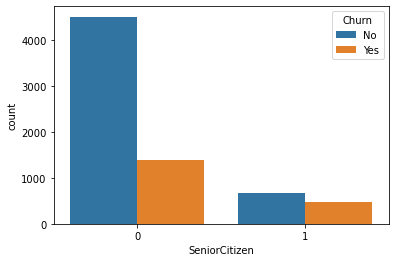

In [21]:
sb.countplot(df['SeniorCitizen'],order=df['SeniorCitizen'].value_counts().index,hue=df['Churn'])

so, most of senior citizen is not the customer of telecomminucations sectors.Even te are there are we see churn- no is higher then churn-yes.Although its good point.

In [ ]:
## senior citizen and phone services 

<Figure size 720x576 with 0 Axes>

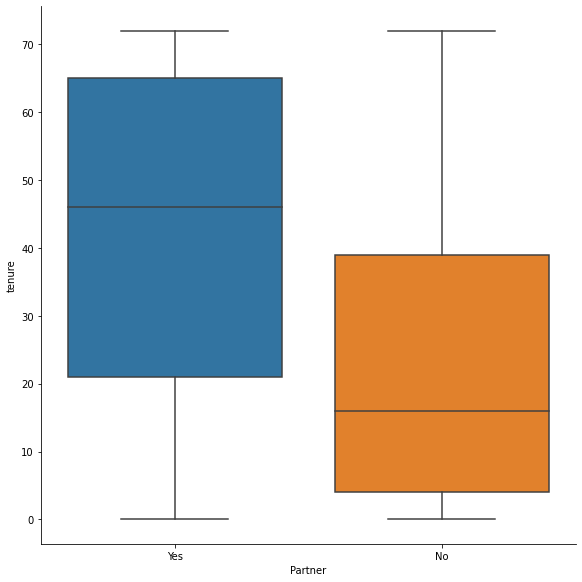

In [29]:
plt.figure(figsize=(10,8))
sb.catplot(y="tenure",x="Partner",data=df.sort_values("tenure",ascending=False),kind='box',aspect=1,height=8)

all most same in both cases.

<Figure size 720x576 with 0 Axes>

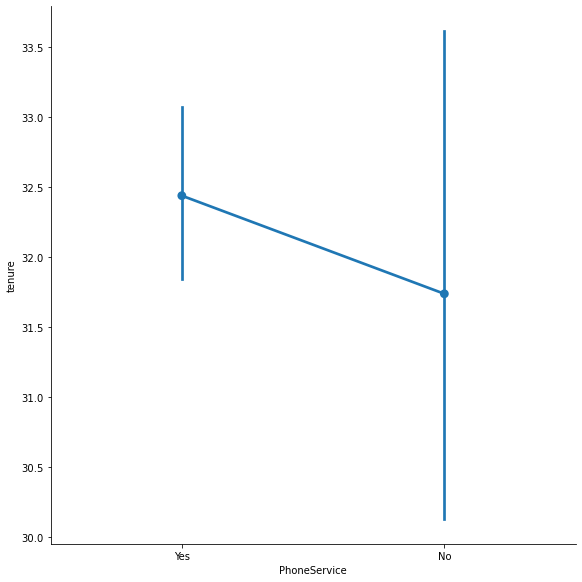

In [38]:
plt.figure(figsize=(10,8))
sb.catplot(y="tenure",x="PhoneService",data=df.sort_values("tenure",ascending=False),kind='point',aspect=1,height=8)

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

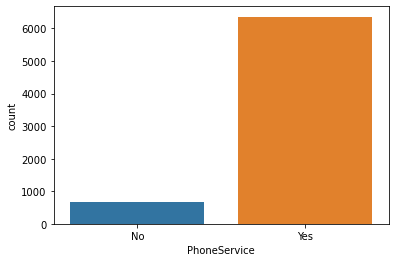

In [40]:
sb.countplot(df['PhoneService']) #majority of customers having the phone services

<Figure size 720x576 with 0 Axes>

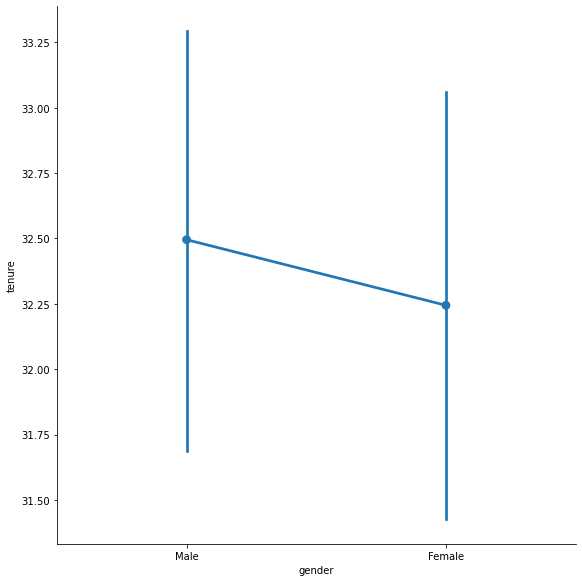

In [37]:
plt.figure(figsize=(10,8))
sb.catplot(y="tenure",x="gender",data=df.sort_values("tenure",ascending=False),kind='point',aspect=1,height=8)

<AxesSubplot:xlabel='gender', ylabel='count'>

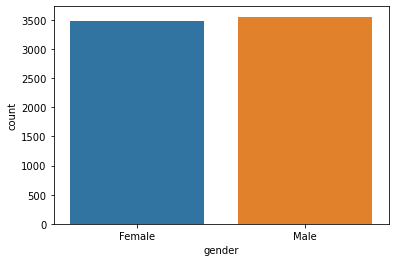

In [41]:
sb.countplot(df['gender']) # almost same in here 

<Figure size 720x576 with 0 Axes>

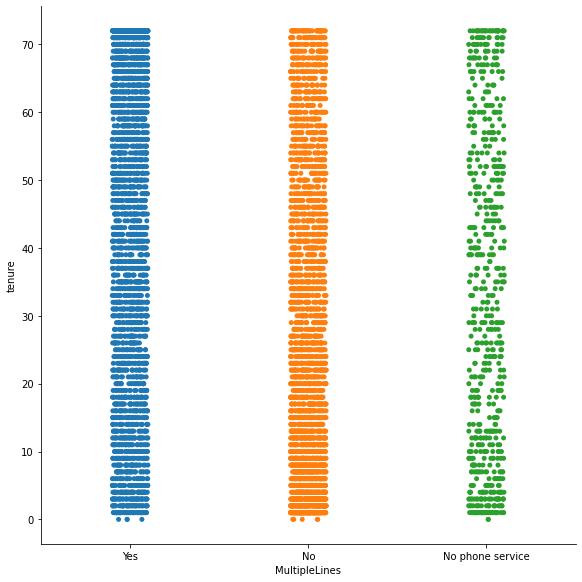

In [39]:
plt.figure(figsize=(10,8))
sb.catplot(y="tenure",x="MultipleLines",data=df.sort_values("tenure",ascending=False),kind='',aspect=1,height=8)

([<matplotlib.patches.Wedge at 0x2969451e8e0>,
 [Text(0.06448547450707494, 1.0981082021265471, 'No'),
  Text(-0.3904535943918405, -1.0283705512248453, 'Yes'),
  Text(1.0494915658479562, -0.32949575598785064, 'No phone service')],
 [Text(0.035173895185677234, 0.5989681102508438, '48.13%'),
  Text(-0.2129746878500948, -0.5609293915771882, '42.18%'),
  Text(0.572449945007976, -0.17972495781155487, '9.68%')])

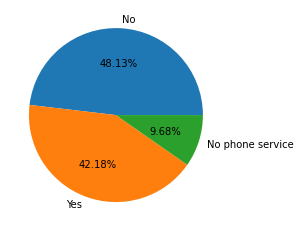

In [47]:
plt.pie(df['MultipleLines'].value_counts().values,labels=df['MultipleLines'].value_counts().index,autopct='%1.2f%%')

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

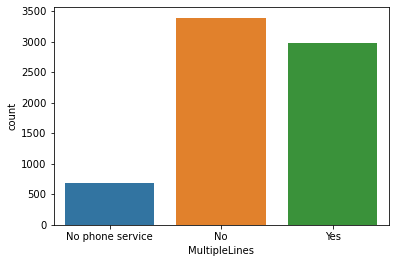

In [51]:
sb.countplot(df['MultipleLines'])

<AxesSubplot:xlabel='InternetService', ylabel='tenure'>

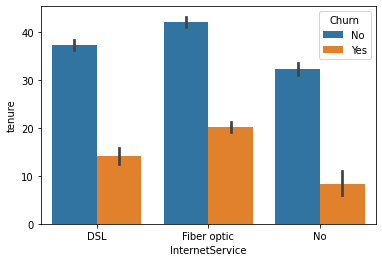

In [56]:
sb.barplot(x=df['InternetService'],y=df['tenure'],hue=df['Churn'])

In [79]:
k=df.groupby(['InternetService','Churn'])['customerID'].count().unstack()
k

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


<AxesSubplot:xlabel='Churn'>

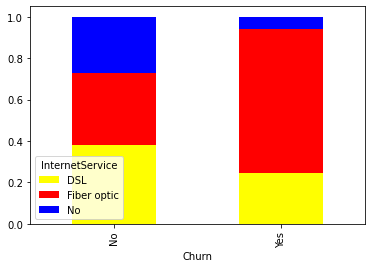

In [105]:
c=k.div(k.sum()).T
fig,ax=plt.subplots()
c.plot(kind='bar',stacked=True,color=['yellow','red','blue'],ax=ax)


In [137]:
d=df.groupby(['PhoneService','InternetService'])['customerID'].count().unstack()
r=d.div(d.sum()).T
r

PhoneService,No,Yes
InternetService,,
DSL,0.281702,0.718298
Fiber optic,NaN,1.000000
No,NaN,1.000000


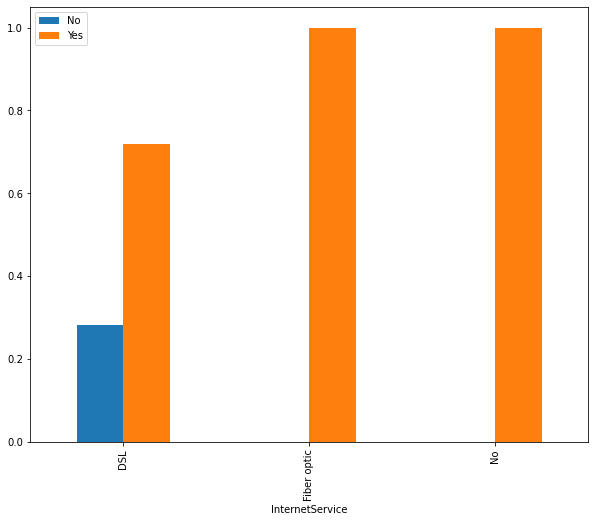

In [138]:
fig,ax=plt.subplots()
r.plot(kind='bar',figsize=(10,8),ax=ax)
ax.legend(loc='best')

# OnlineSecurity and InternetService

In [145]:
p=df.groupby(['OnlineSecurity','InternetService'])['customerID'].count().unstack()
print(p)

e=d.div(d.sum()).T
e

InternetService         DSL  Fiber optic      No
OnlineSecurity                                  
No                   1241.0       2257.0     NaN
No internet service     NaN          NaN  1526.0
Yes                  1180.0        839.0     NaN


OnlineSecurity,No,No internet service,Yes
InternetService,,,
DSL,0.512598,NaN,0.487402
Fiber optic,0.729005,NaN,0.270995
No,NaN,1.0,NaN


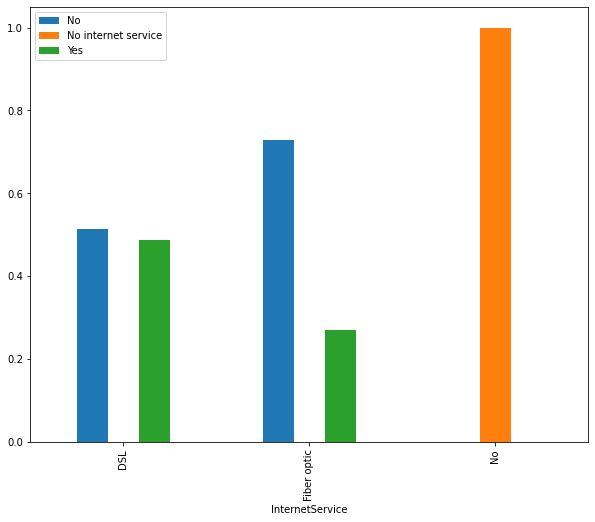

In [149]:
fig,ax=plt.subplots()
e.plot(kind='bar',figsize=(10,8),ax=ax)
ax.legend(loc='best')


- there are 3 type of internet services DSL, Fiber optic, and with online security and without online security
      
    - 1563 has no internet services therefor no security 
    - 1241 has DSL with no online security and 2257 has fiber optic with no online security 
    - 1180 has DSL with with online security and 839 has fiber optic with online security 

In [155]:
t=df.groupby(['MultipleLines','PhoneService'])['customerID'].count().unstack()
t

PhoneService,No,Yes
MultipleLines,,
No,NaN,3390.0
No phone service,682.0,NaN
Yes,NaN,2971.0


<AxesSubplot:xlabel='MultipleLines'>

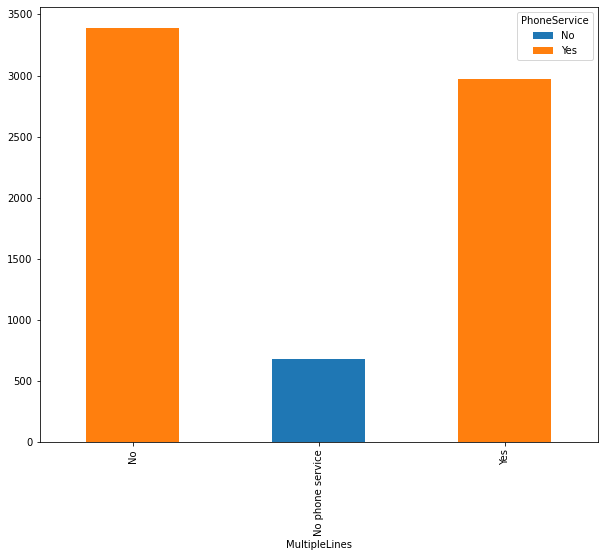

In [157]:
t.plot(kind='bar',stacked=True,figsize=(10,8))

### Phone services and dependents

In [167]:
t=df.groupby(['Dependents','PhoneService'])['customerID'].count().unstack()
u=t.div(t.sum()).T
t

PhoneService,No,Yes
Dependents,,
No,476,4457
Yes,206,1904


<AxesSubplot:xlabel='Dependents'>

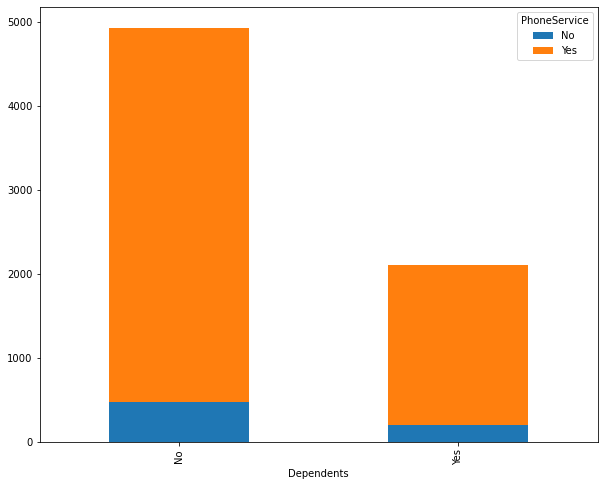

In [169]:
t.plot(kind='bar',figsize=(10,8),stacked=True)

## InternetService','OnlineSecurity','Churn'

In [174]:
d=df.groupby(['InternetService','OnlineSecurity','Churn'])['customerID'].count().unstack()
d

Churn                                  No   Yes
InternetService OnlineSecurity                 
DSL             No                    894   347
                Yes                  1068   112
Fiber optic     No                   1143  1114
                Yes                   656   183
No              No internet service  1413   113

<AxesSubplot:xlabel='InternetService,OnlineSecurity'>

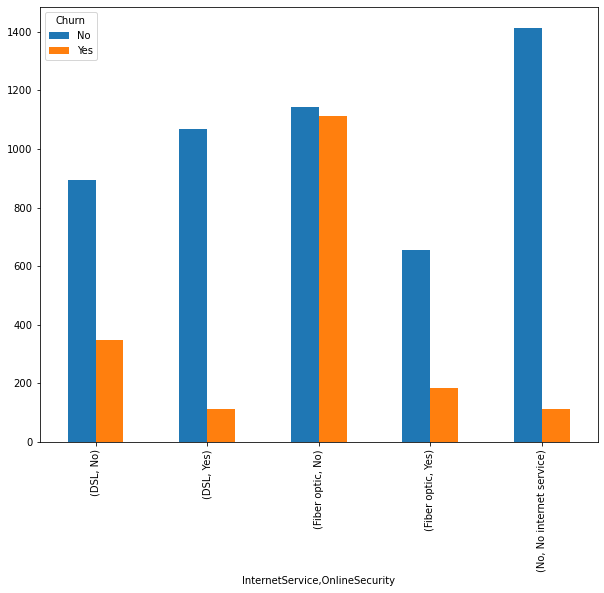

In [178]:
d.plot(kind='bar',figsize=(10,8))

here, we see that internet services with or without online security and without it if they are churn or not 
         
   - 894+347 +1068 +112 +1143+1114+656+183+1413+113=7043
   - we all add up and shows the numbers here.
   
  

### OnlineBackup','InternetService','OnlineSecurity','Churn'

In [182]:
n=df.groupby(['OnlineBackup','InternetService','OnlineSecurity','Churn'])['customerID'].count().unstack()
n

Churn                                                      No  Yes
OnlineBackup        InternetService OnlineSecurity                
No                  DSL             No                    518  274
                                    Yes                   474   69
                    Fiber optic     No                    620  783
                                    Yes                   243  107
No internet service No              No internet service  1413  113
Yes                 DSL             No                    376   73
                                    Yes                   594   43
                    Fiber optic     No                    523  331
                                    Yes                   413   76

<AxesSubplot:xlabel='OnlineBackup,InternetService,OnlineSecurity'>

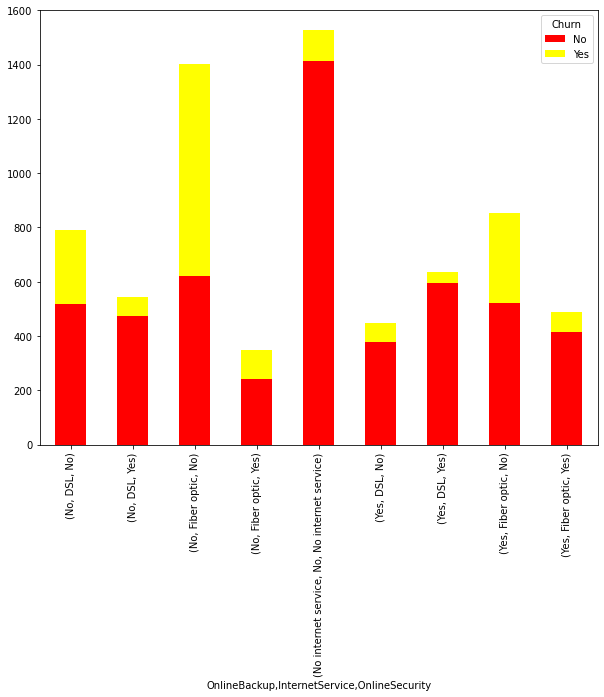

In [185]:
n.plot(kind='bar',stacked=True,color=['red','yellow'],figsize=(10,8))

In [186]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### InternetService, DeviceProtection, OnlineSecurity,OnlineBackup

In [202]:
j=df.groupby(['InternetService','DeviceProtection','OnlineSecurity','OnlineBackup'])['customerID'].count().unstack()


AxesSubplot(0.125,0.125;0.775x0.755)


OnlineBackup                                                No  \
InternetService DeviceProtection    OnlineSecurity               
DSL             No                  No                   551.0   
                                    Yes                  287.0   
                Yes                 No                   241.0   
                                    Yes                  256.0   
Fiber optic     No                  No                   958.0   
                                    Yes                  188.0   
                Yes                 No                   445.0   
                                    Yes                  162.0   
No              No internet service No internet service    NaN   

OnlineBackup                                             No internet service  \
InternetService DeviceProtection    OnlineSecurity                             
DSL             No                  No                                   NaN   
                                    Yes                                  NaN   
                Yes                 No                                   NaN   
                                    Yes                                  NaN   
Fiber optic     No                  No                                   NaN   
                                    Yes                                  NaN   
                Yes                 No                                   NaN   
                                    Yes                                  NaN   
No              No internet service No internet service               1526.0   

OnlineBackup                                               Yes  
InternetService DeviceProtection    OnlineSecurity              
DSL             No                  No                   261.0  
                                    Yes                  257.0  
                Yes                 No                   188.0  
                                    Yes                  380.0  
Fiber optic     No                  No                   417.0  
                                    Yes                  176.0  
                Yes                 No                   437.0  
                                    Yes                  313.0  
No              No internet service No internet service    NaN

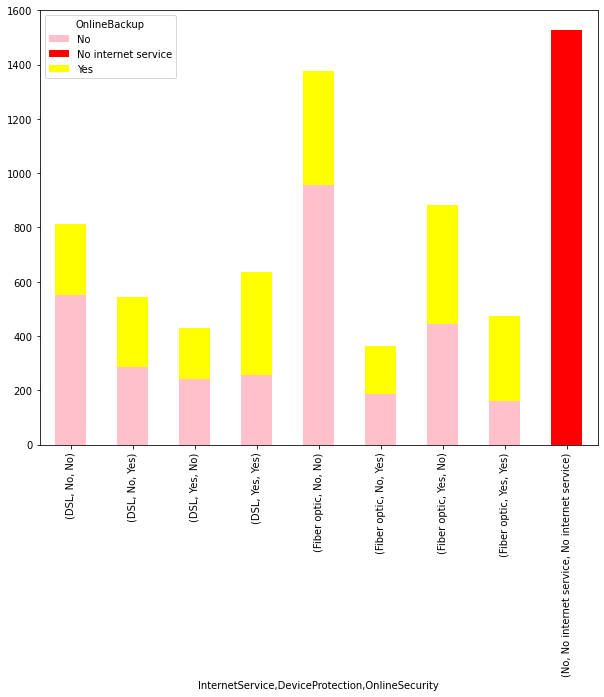

In [201]:
r=j.plot(kind='bar',figsize=(10,8),stacked=True,color=['pink','red','yellow'])
print(r)
j

In [203]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport  & InternetService and Churn

TechSupport                                                                     No  \
InternetService OnlineSecurity      OnlineBackup        DeviceProtection             
DSL             No                  No                  No                   419.0   
                                                        Yes                  130.0   
                                    Yes                 No                   156.0   
                                                        Yes                   83.0   
                Yes                 No                  No                   160.0   
                                                        Yes                   88.0   
                                    Yes                 No                   106.0   
                                                        Yes                  101.0   
Fiber optic     No                  No                  No                   848.0   
                                                        Yes                  316.0   
                                    Yes                 No                   315.0   
                                                        Yes                  286.0   
                Yes                 No                  No                   148.0   
                                                        Yes                   87.0   
                                    Yes                 No                   108.0   
                                                        Yes                  122.0   
No              No internet service No internet service No internet service    NaN   

TechSupport                                                                  No internet service  \
InternetService OnlineSecurity      OnlineBackup        DeviceProtection                           
DSL             No                  No                  No                                   NaN   
                                                        Yes                                  NaN   
                                    Yes                 No                                   NaN   
                                                        Yes                                  NaN   
                Yes                 No                  No                                   NaN   
                                                        Yes                                  NaN   
                                    Yes                 No                                   NaN   
                                                        Yes                                  NaN   
Fiber optic     No                  No                  No                                   NaN   
                                                        Yes                                  NaN   
                                    Yes                 No                                   NaN   
                                                        Yes                                  NaN   
                Yes                 No                  No                                   NaN   
                                                        Yes                                  NaN   
                                    Yes                 No                                   NaN   
                                                        Yes                                  NaN   
No              No internet service No internet service No internet service               1526.0   

TechSupport                                                                    Yes  
InternetService OnlineSecurity      OnlineBackup        DeviceProtection            
DSL             No                  No                  No                   132.0  
                                                        Yes                  111.0  
                                    Yes                 No                   105.0  
                                       

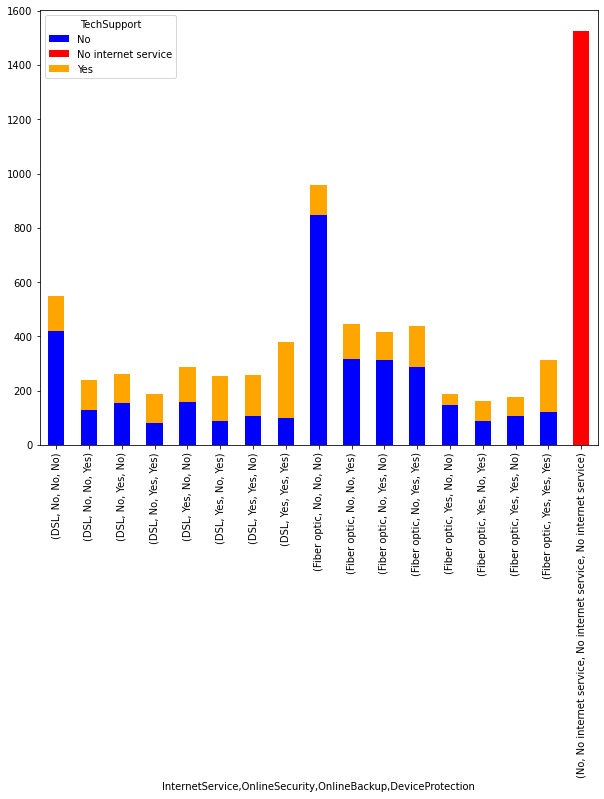

In [211]:
l=df.groupby(['InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'])['customerID'].count().unstack()
l
l.plot(kind='bar',stacked=True,figsize=(10,8),color=['blue','red','orange'])
l

### InternetService,DeviceProtection and TechSupport

In [215]:
r=df.groupby(['DeviceProtection', 'TechSupport','InternetService'])['customerID'].count().unstack()
r

InternetService                            DSL  Fiber optic      No
DeviceProtection    TechSupport                                    
No                  No                   841.0       1419.0     NaN
                    Yes                  515.0        320.0     NaN
No internet service No internet service    NaN          NaN  1526.0
Yes                 No                   402.0        811.0     NaN
                    Yes                  663.0        546.0     NaN

<AxesSubplot:xlabel='DeviceProtection,TechSupport'>

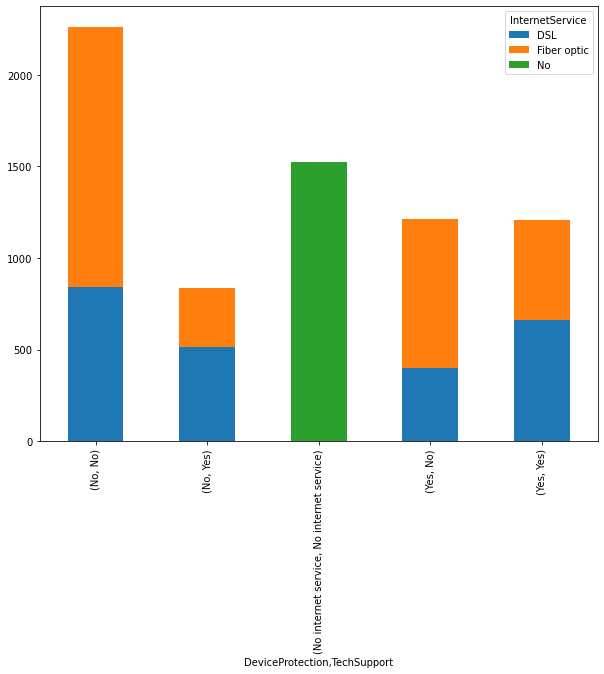

In [214]:
r.plot(kind='bar',stacked=True,figsize=(10,8))

In [216]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### StreamingTV','StreamingMovies'---Tech support [yes,no, no internet service]

In [226]:
a=df.groupby(['StreamingTV','StreamingMovies','TechSupport'])['customerID'].count().unstack()
q=a.div(a.sum()).T

StreamingTV                No           No internet service       Yes  \
StreamingMovies            No       Yes No internet service        No   
TechSupport                                                             
No                   0.424993  0.146271                 NaN  0.141952   
No internet service       NaN       NaN                 1.0       NaN   
Yes                  0.265166  0.138943                 NaN  0.134051   

StreamingTV                    
StreamingMovies           Yes  
TechSupport                    
No                   0.286784  
No internet service       NaN  
Yes                  0.461840

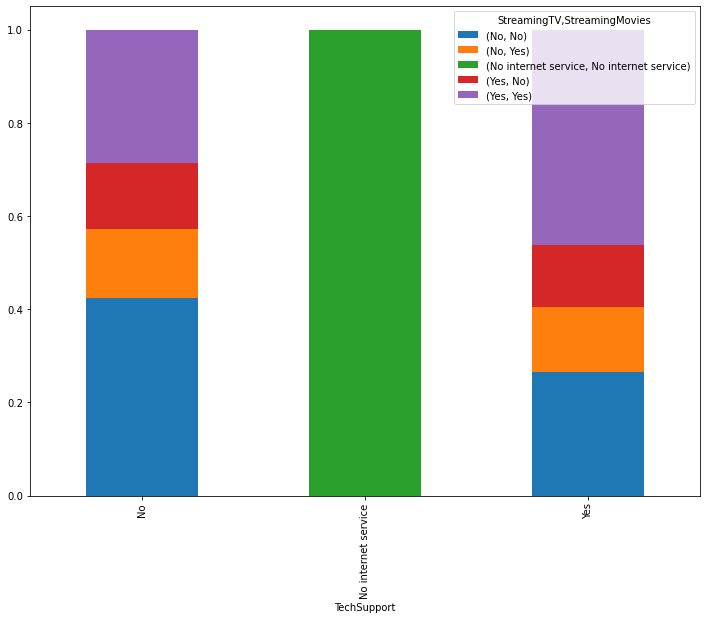

In [229]:
q.plot(kind='bar',stacked=True,figsize=(12,9))
q

### streming movies


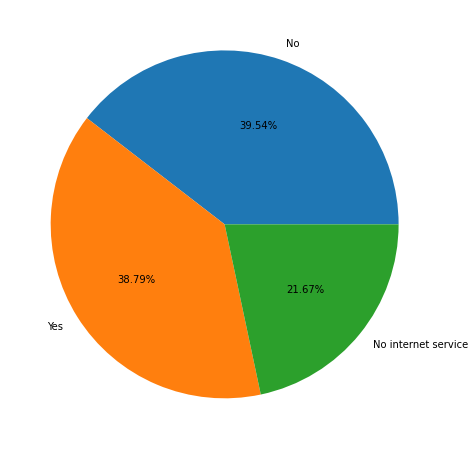

In [252]:
plt.figure(figsize=(10,8))
plt.pie(df.loc[:,'StreamingMovies'].value_counts().values,labels=df.loc[:,'StreamingMovies'].value_counts().index,data=df,autopct='%0.2f%%')
plt.show()

### StreamingTV

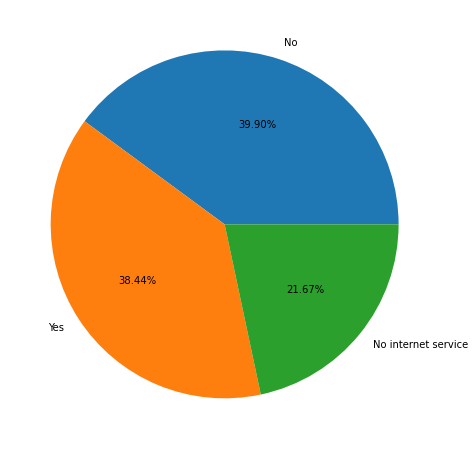

In [251]:
plt.figure(figsize=(10,8))
plt.pie(df.loc[:,'StreamingTV'].value_counts().values,labels=df.loc[:,'StreamingTV'].value_counts().index,autopct='%0.2f%%')
plt.show()


### Contract

In [254]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<AxesSubplot:xlabel='Contract', ylabel='count'>

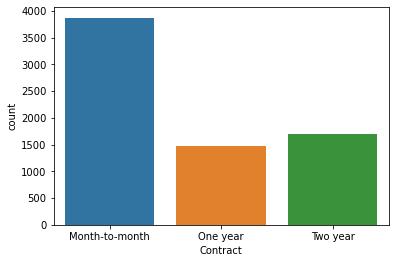

In [255]:
sb.countplot(df['Contract'])

In [262]:
r=df.groupby(['InternetService','PhoneService','Contract'])['customerID'].count().unstack()

<AxesSubplot:xlabel='InternetService,PhoneService'>

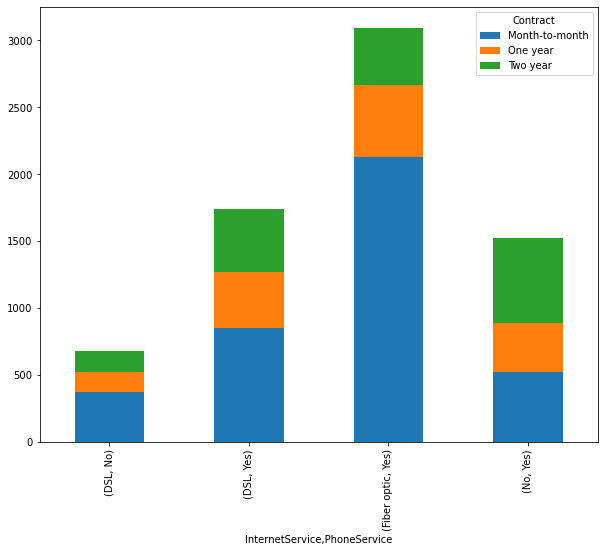

In [264]:
r.plot(kind='bar',stacked=True,figsize=(10,8))

### PaperlessBilling

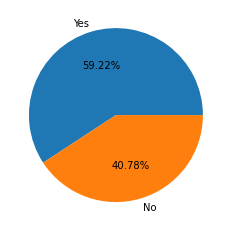

In [270]:
plt.pie(df.loc[:,'PaperlessBilling'].value_counts().values,labels=df.loc[:,'PaperlessBilling'].value_counts().index,data=df,autopct='%0.2f%%')
plt.show()

### PaymentMethod

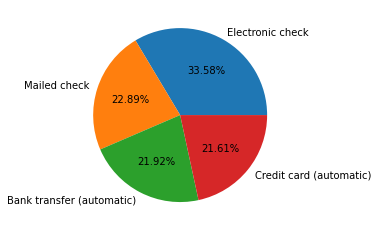

In [271]:
plt.pie(df.loc[:,'PaymentMethod'].value_counts().values,labels=df.loc[:,'PaymentMethod'].value_counts().index,data=df,autopct='%0.2f%%')
plt.show()

### Continous columns 

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

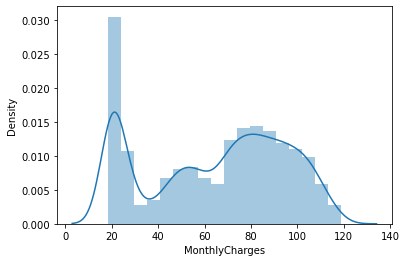

In [275]:
sb.distplot(df['MonthlyCharges'])

for look it is not univariant 

In [325]:
# changing object to float for plotting graph 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

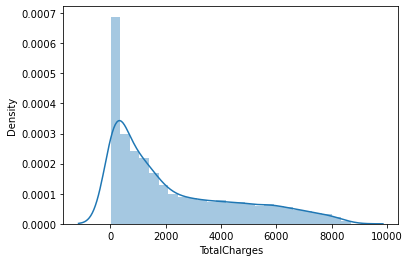

In [326]:
sb.distplot(df['TotalCharges'])

 - graph shows uni variant, having little skewed value

<AxesSubplot:xlabel='tenure', ylabel='Density'>

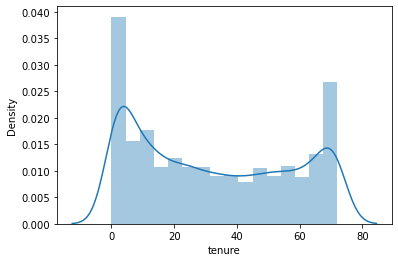

In [296]:
sb.distplot(df['tenure'])

 - Bivariant is shown in figure

<AxesSubplot:>

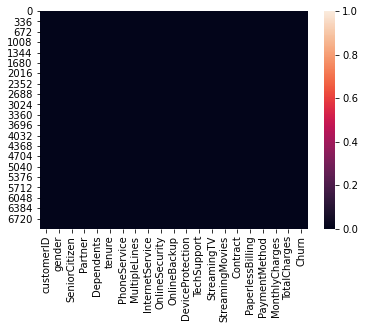

In [301]:
sb.heatmap(df.isnull())

no, null values is shown here 

In [303]:
df.isnull().sum() ## here we see total charges has 11 null values 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Removing the null values

In [328]:
df['TotalCharges']=df['TotalCharges'].fillna(np.around(df['TotalCharges'].median()))

In [329]:
df['TotalCharges'].isnull().sum() # No null values 

0

# Feature Engineering

In [331]:
cont=df[['tenure','TotalCharges','MonthlyCharges']]

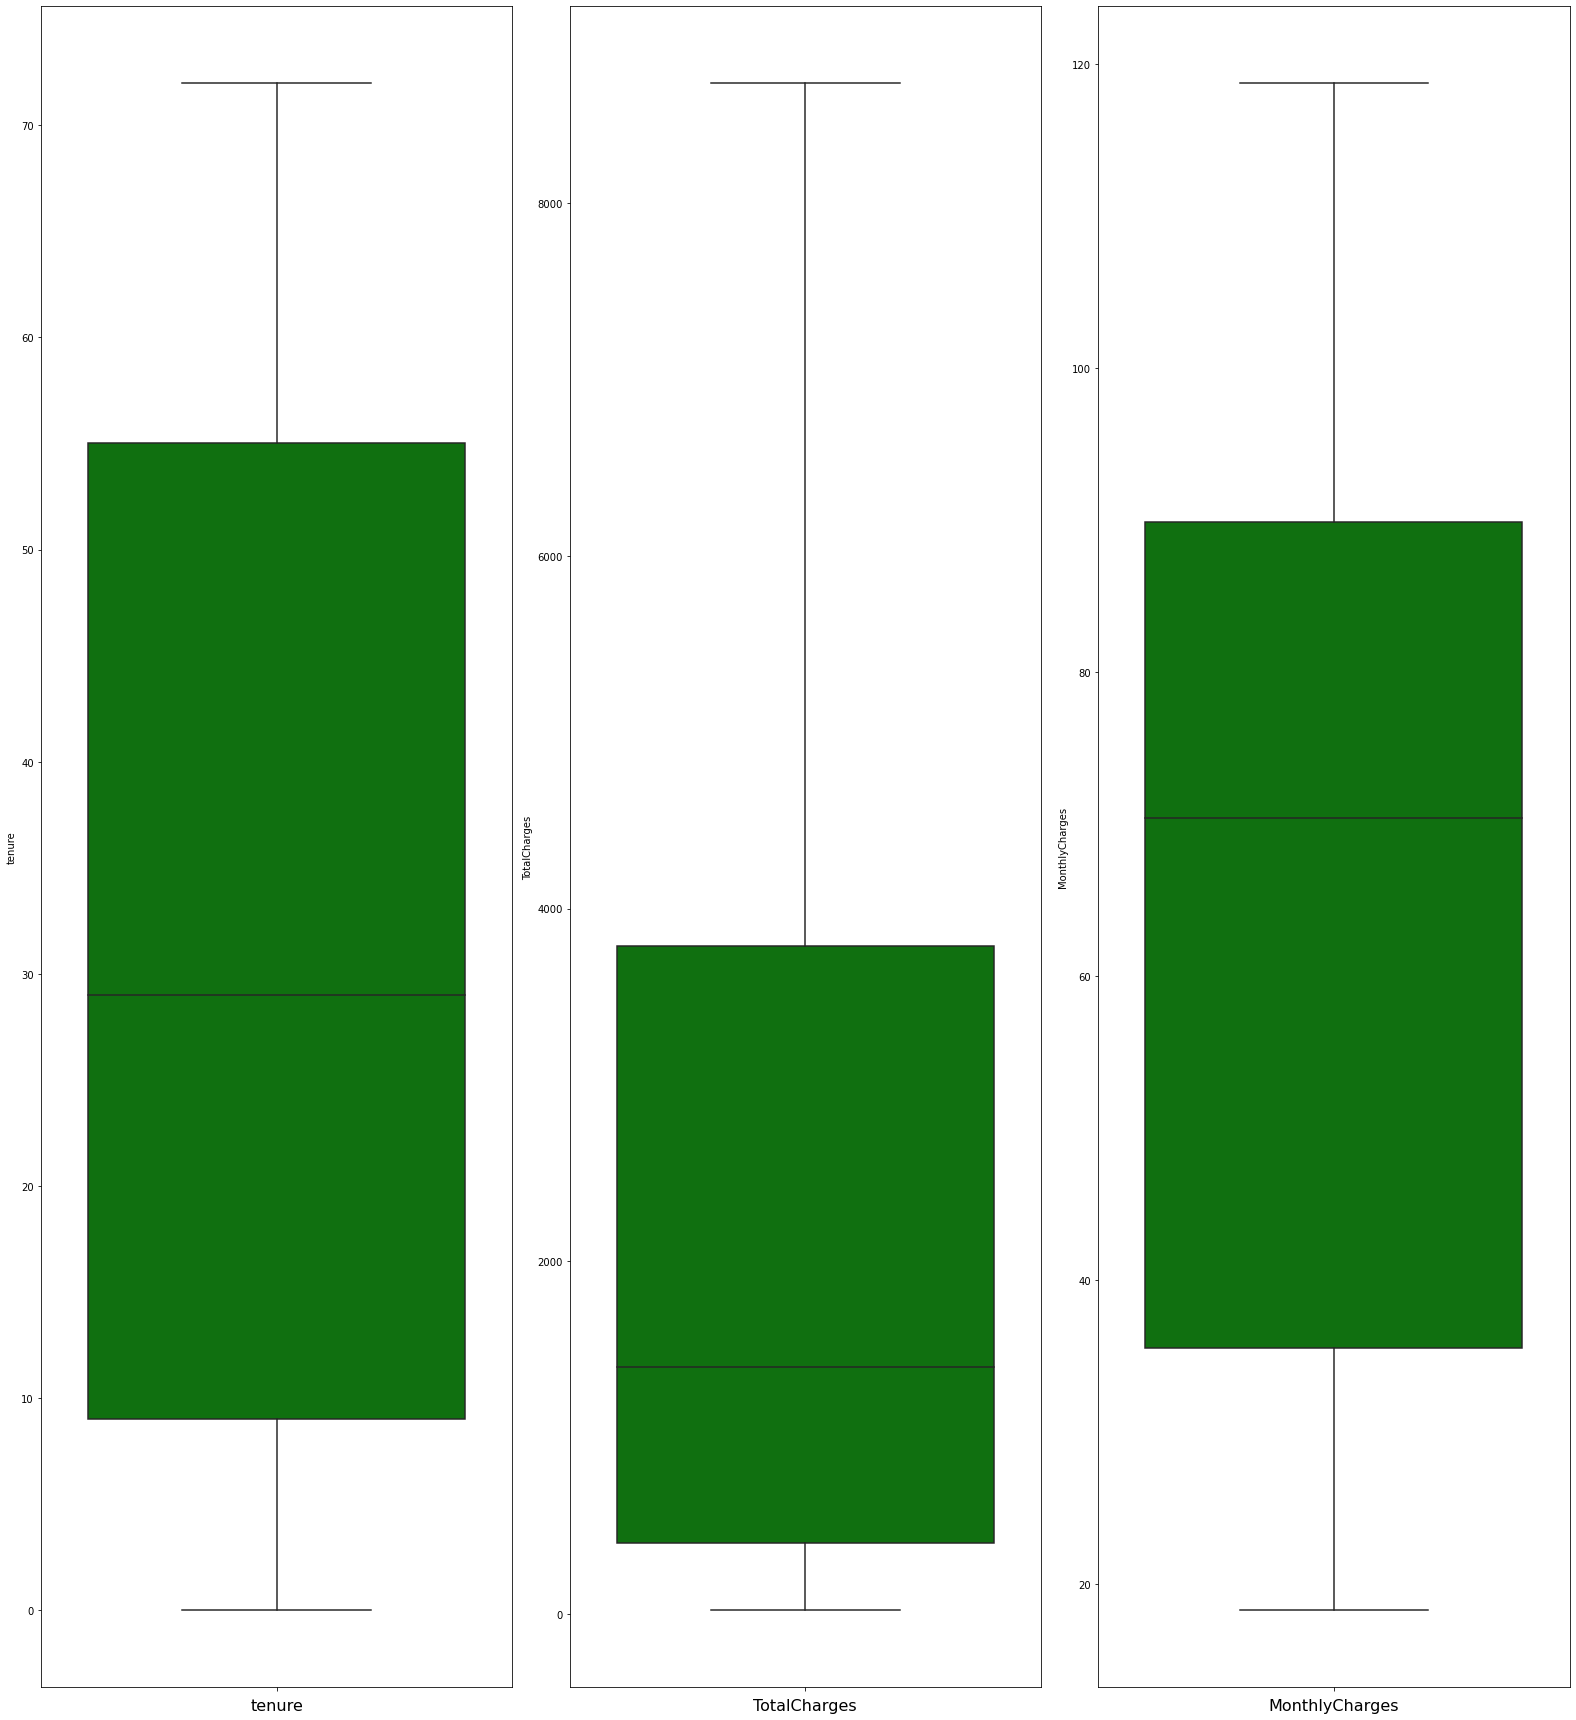

In [341]:
plt.figure(figsize=(22,24))
num=1

for columns in cont:
    
    if num<=3:
        ax=plt.subplot(1,3,num)
        sb.boxplot(y=cont[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()


No outliers as far we see

# FEATURE ENGINEERING 

In [343]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [346]:
from sklearn.preprocessing import LabelEncoder

In [357]:
df['gender']=le.fit_transform(df['gender'])

In [358]:
df['SeniorCitizen']=le.fit_transform(df['SeniorCitizen'])
df['Partner']=le.fit_transform

In [360]:
 labelcolumn=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']]

In [368]:
for l in labelcolumn.columns:
    df[l]=le.fit_transform(df[l])

In [374]:
for d in df.columns:
    print('\n','The unique values of',d,':-',df[d].unique())


 The unique values of customerID :- ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

 The unique values of gender :- [0 1]

 The unique values of SeniorCitizen :- [0 1]

 The unique values of Partner :- [1 0]

 The unique values of Dependents :- [0 1]

 The unique values of tenure :- [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

 The unique values of PhoneService :- [0 1]

 The unique values of MultipleLines :- [1 0 2]

 The unique values of InternetService :- [0 1 2]

 The unique values of OnlineSecurity :- [0 2 1]

 The unique values of OnlineBackup :- [2 0 1]

 The unique values of DeviceProtection :- [0 2 1]

 The unique values of TechSupport :- [0 2 1]

 The unique values of StreamingTV :- [0 2 1]

 The unique values of StreamingMovies :- [0 2 1]

 The unique values o

here we converted all the catageorical values into numeric values. Now we can find the prediction 

# Correlation 

In [375]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000002,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102652,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318364,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.063593,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.825464,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113013,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452849,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175589,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253935,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375062,-0.195525


<AxesSubplot:>

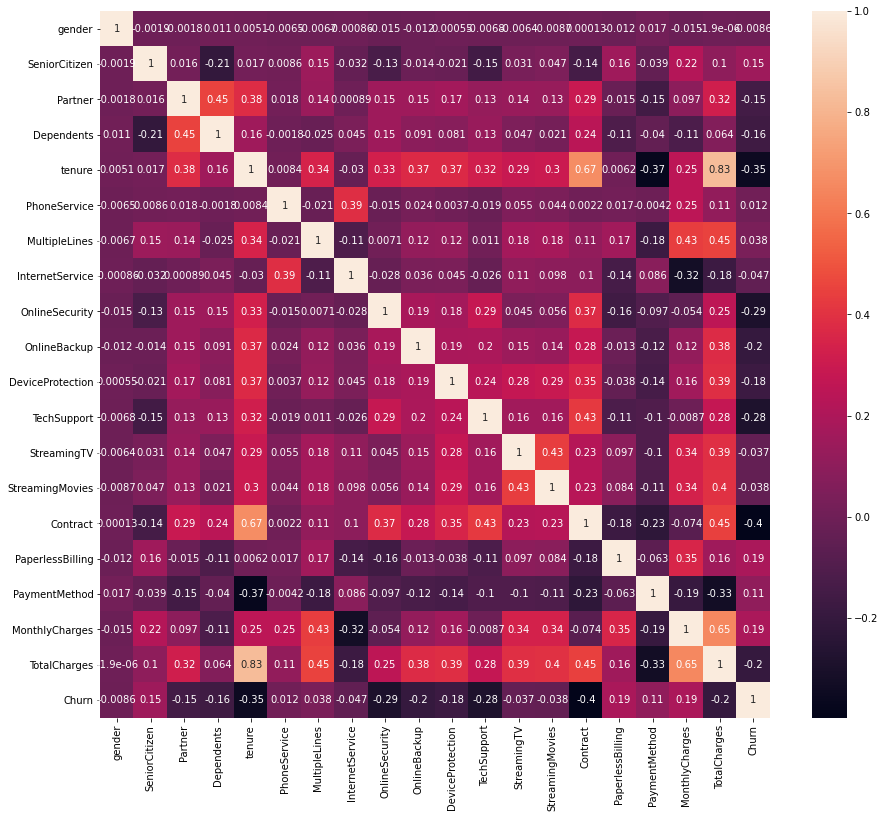

In [379]:
plt.figure(figsize=(15,13))
sb.heatmap(df.corr(),annot=True)

keeping the threshold is(0.90)
we see here, 
 - 0.83 is the correlation between total charges and churn 
 - 0.67 is the correlation between contract and tenure 
 - 0.65 is the correlation between totalcharge and monthlycharge
 
 here, correlation may high but not above the threshold. so we are good to proceed.  

### I am not working on skewness and outliers, here we see there is no Outliers, but if we see there might be skewed value in in continous columns but still i am not doing operation, cause if i do showing problem in prediction, and as for there are high no of categorical data,so i am keeping the dataset as it is 

# Checking VIF

In [380]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [382]:
X=df.drop(columns=['customerID','Churn'],axis=1)

In [381]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [390]:
vif_data=pd.DataFrame()
vif_data['Feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]

In [392]:
vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
17,MonthlyCharges,20.437265
5,PhoneService,15.137916
4,tenure,14.741475
18,TotalCharges,13.744877
7,InternetService,4.352505
14,Contract,4.160278
13,StreamingMovies,3.262125
12,StreamingTV,3.240593
16,PaymentMethod,3.095910
15,PaperlessBilling,2.871827


# Feature selection:-

In [398]:
x=df.drop(columns=['customerID','Churn'],axis=1)
y=df['Churn']

In [400]:
from sklearn.ensemble import RandomForestClassifier
select= RandomForestClassifier()
select.fit(x,y)

RandomForestClassifier()

In [401]:
add=select.feature_importances_
add

array([0.02726805, 0.02060166, 0.02336189, 0.01935213, 0.15055556,
       0.00462714, 0.02118938, 0.02790836, 0.04236372, 0.02507573,
       0.02525205, 0.04077522, 0.0168014 , 0.01736261, 0.07980648,
       0.02567483, 0.04995921, 0.18197159, 0.20009299])

In [414]:
for index, feature_importance in enumerate (select.feature_importances_):
    print(index,feature_importance)

0 0.027268051341515307
1 0.02060165982373127
2 0.023361893166001495
3 0.019352126524722957
4 0.15055556442747195
5 0.004627139688237436
6 0.021189376493194745
7 0.027908355609843536
8 0.042363721681854656
9 0.025075731281447966
10 0.02525204580311019
11 0.04077521929095424
12 0.016801401090005202
13 0.017362607194237156
14 0.07980647692447085
15 0.025674829769242024
16 0.04995921280093564
17 0.18197159223073778
18 0.20009299485828563


In [422]:
imp_feature=pd.DataFrame()
imp_feature['Feature']=x.columns
imp_feature['values']=select.feature_importances_


In [427]:
np.round(imp_feature.sort_values(by='values',ascending=True),4)

,Feature,values
5,PhoneService,0.0046
12,StreamingTV,0.0168
13,StreamingMovies,0.0174
3,Dependents,0.0194
1,SeniorCitizen,0.0206
6,MultipleLines,0.0212
2,Partner,0.0234
9,OnlineBackup,0.0251
10,DeviceProtection,0.0253
15,PaperlessBilling,0.0257


In [428]:
0.02726805+ 0.02060166+ 0.02336189+ 0.01935213+ 0.15055556+0.00462714+ 0.02118938+ 0.02790836+ 0.04236372+ 0.02507573+0.02525205+ 0.04077522+ 0.0168014 + 0.01736261+ 0.07980648+0.02567483+ 0.04995921+ 0.18197159+ 0.20009299

1.0

Here we see almost all the columns shows 1.0 %, we may or may not  drop columns which is almost close to 0 or equal to zero. Although i am not dropping any columns.I am using all the columns for prediction,we do several operations to see the accuracy score

# Scaling Data

In [446]:
from sklearn.preprocessing import StandardScaler

In [448]:
Scale=StandardScaler()
X_scaled=Scale.fit_transform(x)

In [449]:
X_scaled

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.99424148],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.17324378],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  1.33486261,
        -0.36266036, -0.95967362],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.85446901],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  1.33486261,
         0.32033821, -0.87206198],
       [ 0.99053183, -0.43991649, -0.96662231, ..., -1.47405205,
         1.35896134,  2.01428809]])

# Balancing Dataset

In [431]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

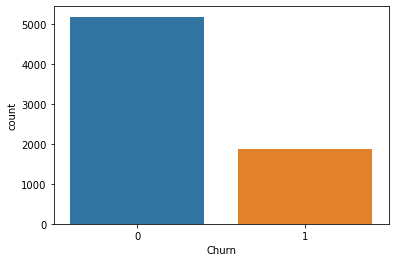

In [432]:
sb.countplot(y)

In [441]:
print(np.round((5174/7043)*100)) 
               
print(np.round((1869/7043)*100))

## imbalance of data almost 50% of imbalance of data 

73.0
27.0


In [445]:
y.value_counts(normalize=True)*100

0    73.463013
1    26.536987
Name: Churn, dtype: float64

In [451]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()


In [452]:
n_x,n_y=sm.fit_resample(X_scaled,y)

# Training Data

In [453]:
from sklearn.model_selection import train_test_split

In [454]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix

finding the best random value

In [455]:
max_accu=0
max_RS=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(n_x,n_y,random_state=i,test_size=.20)
    lr= LogisticRegression()
    lr.fit(x_train,y_train)
    pred= lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_accu:
        max_accu=acc
        max_RS=i
print("Best accuracy is ",max_accu,"on Random State =",max_RS)

Best accuracy is  0.8004830917874396 on Random State = 161


In [457]:
 x_train,x_test,y_train,y_test= train_test_split(n_x,n_y,random_state=161,test_size=.20)

In [460]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier

In [461]:
lr_model=LogisticRegression()
dt_model=DecisionTreeClassifier()
svc_model=SVC()
knn_model=KNeighborsClassifier()
rd_model=RandomForestClassifier()
xgb_model=XGBClassifier()
sdg_model=SGDClassifier()
bag_model=BaggingClassifier()
ada_model=AdaBoostClassifier()
gd_model=GradientBoostingClassifier()
et_model=ExtraTreeClassifier()
nural_model=MLPClassifier()

In [462]:
models=[lr_model,dt_model,svc_model,knn_model,rd_model,xgb_model,sdg_model,bag_model,ada_model,gd_model,et_model,nural_model]

In [463]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predict=m.predict(x_test)
    print('Accuracy Score of ',m, 'is', accuracy_score(y_test,predict))
    print("F1 Score", f1_score(y_test,predict))
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,predict))
    print('Classification_report',classification_report(y_test,predict))
    print('*******************************************')

Accuracy Score of  LogisticRegression() is 0.8004830917874396
F1 Score 0.8034269395525939
Confusion Matrix of  LogisticRegression()  is 
 [[813 256]
 [157 844]]
Classification_report               precision    recall  f1-score   support

           0       0.84      0.76      0.80      1069
           1       0.77      0.84      0.80      1001

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070

*******************************************
Accuracy Score of  DecisionTreeClassifier() is 0.7908212560386474
F1 Score 0.7855373947498763
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[844 225]
 [208 793]]
Classification_report               precision    recall  f1-score   support

           0       0.80      0.79      0.80      1069
           1       0.78      0.79      0.79      1001

    accuracy                           0.79      2070
   macro avg       0.79      0.79    

In [464]:
from sklearn.model_selection import cross_val_score

In [466]:
for i in models:
    print('Accuracy_Score of ',i, 'is', accuracy_score(y_test,i.predict(x_test)))
    print("cross Validation accuracy score of ",i ," is ",cross_val_score(i,n_x,n_y,cv=5, scoring='accuracy').mean())
    print('@'*50)

Accuracy_Score of  LogisticRegression() is 0.8004830917874396
cross Validation accuracy score of  LogisticRegression()  is  0.7784136190322754
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  DecisionTreeClassifier() is 0.7908212560386474
cross Validation accuracy score of  DecisionTreeClassifier()  is  0.7845076269662816
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  SVC() is 0.8256038647342995
cross Validation accuracy score of  SVC()  is  0.8008357090988902
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  KNeighborsClassifier() is 0.7971014492753623
cross Validation accuracy score of  KNeighborsClassifier()  is  0.7885607880770426
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  RandomForestClassifier() is 0.866183574879227
cross Validation accuracy score of  RandomForestClassifier()  is  0.8497387475104079
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
Accuracy_Score of  XGBClassifier(base_sco

here the highest accuracy 86.61 shows in Random forest model and the cross val is 84.97 almost close to 85%, so i am using this model for prediction

# Hyperparameter Tuning

In [467]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [468]:
n_estimator= [200, 400, 600, 800, 1000]  
max_features= ['auto','sqrt','log2']  
max_depth=[10, 64, 104, 187, 212, 282, 378]  
min_samples_split= [1,2,3]  
min_samples_leaf= [1,3,4,6,7,9] 

In [469]:
parameter= {'n_estimators': n_estimator,
             'max_features':max_features,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf,
             }

In [470]:
random= RandomizedSearchCV(rd_model,param_distributions=parameter,cv=5,n_jobs=-1)
random.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 64, 104, 187, 212,
                                                      282, 378],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 3, 4, 6, 7, 9],
                                        'min_samples_split': [1, 2, 3],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]})

In [471]:
random.best_estimator_

RandomForestClassifier(max_depth=282, max_features='auto', n_estimators=200)

In [472]:
random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 282}

In [473]:
Rd_model=RandomForestClassifier( n_estimators = 200,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features= 'auto',
 max_depth = 282)

Rd_model.fit(x_train,y_train)
Rd_model_predict=Rd_model.predict(x_test)

In [474]:
accuracy_score(y_test,Rd_model_predict)

0.8618357487922705

In [ ]:
cross_val_score()

In [476]:
cross_val_score(Rd_model,n_x,n_y,cv=5, scoring='accuracy').mean()

0.8533141871145947

# Comparing the tuned and untuned models:-

- NOt Tuned:- 0.866183574879227 ----accuracy score, before cross validation
        0.8497387475104079----- accuracy score after cross validation 
        
- Tuned:-0.8618357487922705-----accuracy score, before cross validation
         0.8533141871145947------accuracy score after cross validation 
         
   selecting the tuned one for better results 
   

# Plot_roc_curve

In [477]:
from sklearn.metrics import roc_auc_score,roc_curve,plot_roc_curve

In [478]:
for m in models:
    m.fit(x_train,y_train)

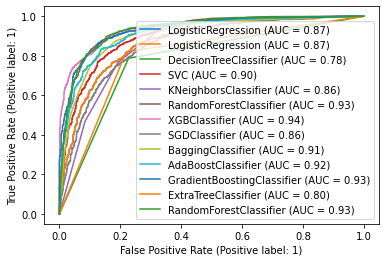

In [483]:

dist=plot_roc_curve(lr_model,x_test,y_test,)
plot_roc_curve(lr_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(dt_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(svc_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(knn_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(rd_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(xgb_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(sdg_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(bag_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(ada_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(gd_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(et_model,x_test,y_test,ax=dist.ax_) ;
plot_roc_curve(Rd_model,x_test,y_test,ax=dist.ax_);



# Saving the model

In [484]:
import pickle
file_name='Customer Churn Analysis'
with open(file_name,'wb') as file:
    pickle.dump(rd_model,file)